In [1]:
import requests
import pandas as pd

# Replace 'YOUR_API_KEY' with your actual Alpha Vantage API key
api_key = '8FHEYWXTU6IPYSH4'
symbol = 'AAPL'  # Example stock symbol
function = 'TIME_SERIES_DAILY'
url = f'https://www.alphavantage.co/query?function={function}&symbol={symbol}&apikey={api_key}'
# Fetch the data
r = requests.get(url)
data = r.json()

# Check if the response contains the expected data
if 'Time Series (Daily)' in data:
    time_series = data['Time Series (Daily)']

    # Convert to DataFrame
    df = pd.DataFrame.from_dict(time_series, orient='index')
    df.index = pd.to_datetime(df.index)
    df = df.sort_index()  # Sort by date

    print("Data fetched successfully!")
    print(df.head())  # Display the first few rows of the DataFrame
else:
    print("Unexpected data structure or error:", data)


Data fetched successfully!
             1. open   2. high    3. low  4. close 5. volume
2024-01-23  195.0200  195.7500  193.8299  195.1800  42355590
2024-01-24  195.4200  196.3800  194.3400  194.5000  53463269
2024-01-25  195.2200  196.2675  193.1125  194.1700  54822126
2024-01-26  194.2700  194.7600  191.9400  192.4200  44594011
2024-01-29  192.0100  192.2000  189.5800  191.7300  47145622


In [2]:
# Preprocess the data
df['Close'] = df['4. close'].astype(float)  # Convert 'Close' column to float
df = df[['Close']]  # Keep only the 'Close' column
df['Target'] = df['Close'].shift(-1)  # Create a column 'Target' with next day's closing price
df.dropna(inplace=True)  # Remove rows with NaN values

print("Data preprocessed successfully!")
print(df.head())  # Display the first few rows of the preprocessed DataFrame


Data preprocessed successfully!
             Close  Target
2024-01-23  195.18  194.50
2024-01-24  194.50  194.17
2024-01-25  194.17  192.42
2024-01-26  192.42  191.73
2024-01-29  191.73  188.04


<ipython-input-2-2192ea9fa564>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target'] = df['Close'].shift(-1)  # Create a column 'Target' with next day's closing price
<ipython-input-2-2192ea9fa564>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)  # Remove rows with NaN values


In [3]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = df[['Close']]
y = df['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print("Data split into training and testing sets successfully!")


Data split into training and testing sets successfully!


In [4]:
from sklearn.linear_model import LinearRegression

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("Model trained successfully!")


Model trained successfully!


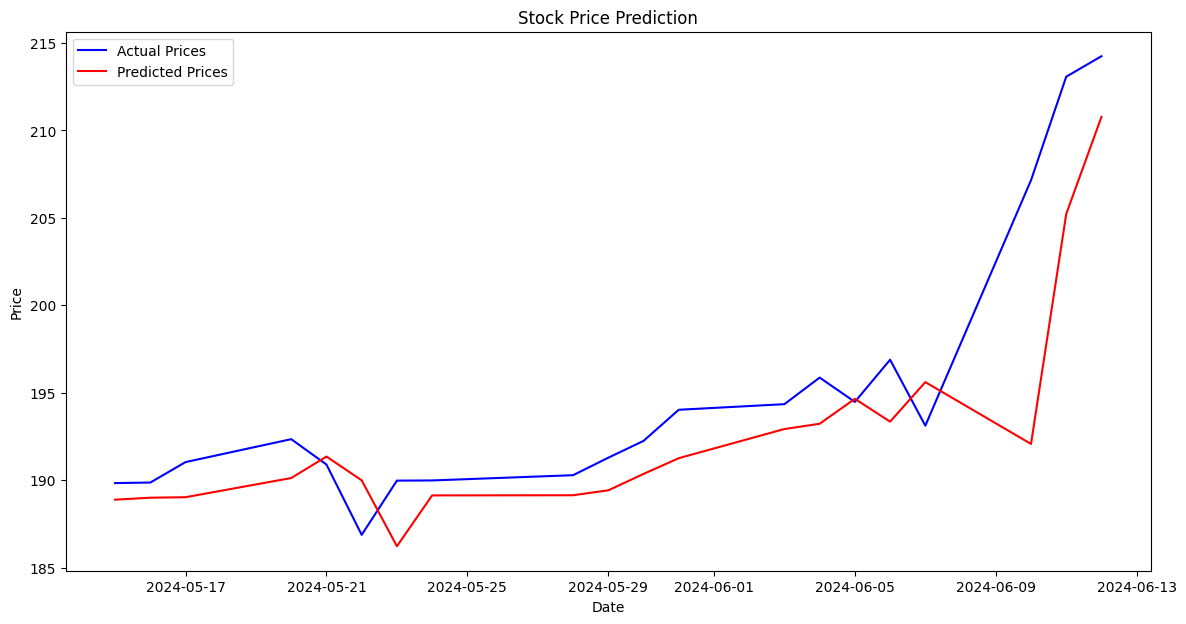

In [7]:
import matplotlib.pyplot as plt

# Visualize the results
plt.figure(figsize=(14, 7))
plt.plot(df.index[-len(y_test):], y_test, label='Actual Prices', color='blue')
plt.plot(df.index[-len(y_test):], y_pred_test, label='Predicted Prices', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()


In [8]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# Calculate R-squared (R2) score
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f'Training MSE: {mse_train}, R2: {r2_train}')
print(f'Testing MSE: {mse_test}, R2: {r2_test}')


Training MSE: 6.110764265450546, R2: 0.9057692707750452
Testing MSE: 18.993321004620814, R2: 0.6564780882443227


In [9]:
# Convert R2 scores to percentage
r2_train_percent = r2_train * 100
r2_test_percent = r2_test * 100

print(f'Training R2: {r2_train_percent:.2f}%')
print(f'Testing R2: {r2_test_percent:.2f}%')


Training R2: 90.58%
Testing R2: 65.65%


In [10]:
import requests
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Fetching Historical Stock Data
def fetch_stock_data(api_key, symbol):
    function = 'TIME_SERIES_DAILY'
    url = f'https://www.alphavantage.co/query?function={function}&symbol={symbol}&apikey={api_key}'
    r = requests.get(url)
    data = r.json()
    return data

# Step 2: Preprocessing the Data and Feature Engineering
def preprocess_data(data):
    if 'Time Series (Daily)' in data:
        time_series = data['Time Series (Daily)']
        df = pd.DataFrame.from_dict(time_series, orient='index')
        df.index = pd.to_datetime(df.index)
        df = df.sort_index()
        df['Close'] = df['4. close'].astype(float)
        df['Volume'] = df['5. volume'].astype(float)
        # Add more features like moving averages, MACD, RSI here
        return df
    else:
        print("Unexpected data structure or error:", data)

# Step 3: Splitting the Data into Training and Testing Sets
def split_data(df):
    X = df[['Close', 'Volume']]  # Select features
    y = df['Close']  # Select target variable
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    return X_train, X_test, y_train, y_test

# Step 4: Training the Model with Random Forest and Hyperparameter Tuning
def train_model(X_train, y_train):
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }
    rf = RandomForestRegressor(random_state=42)
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    return best_model

# Step 5: Evaluating the Model and Calculating Accuracy
def evaluate_model(model, X_train, X_test, y_train, y_test):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    # Convert R2 scores to percentage
    r2_train_percent = r2_train * 100
    r2_test_percent = r2_test * 100
    return mse_train, mse_test, r2_train_percent, r2_test_percent

# Step 6: Main Function
def main():
    api_key = '8FHEYWXTU6IPYSH4'
    symbol = 'AAPL'  # Example stock symbol
    data = fetch_stock_data(api_key, symbol)
    df = preprocess_data(data)
    X_train, X_test, y_train, y_test = split_data(df)
    model = train_model(X_train, y_train)
    mse_train, mse_test, r2_train_percent, r2_test_percent = evaluate_model(model, X_train, X_test, y_train, y_test)
    print(f'Training MSE: {mse_train}, R2: {r2_train_percent:.2f}%')
    print(f'Testing MSE: {mse_test}, R2: {r2_test_percent:.2f}%')

if __name__ == "__main__":
    main()


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Training MSE: 0.013932611750004825, R2: 99.98%
Testing MSE: 45.03749587350005, R2: 18.54%


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Training MSE: 0.013932611750004825, R2: 99.98%
Testing MSE: 45.03749587350005, R2: 18.54%


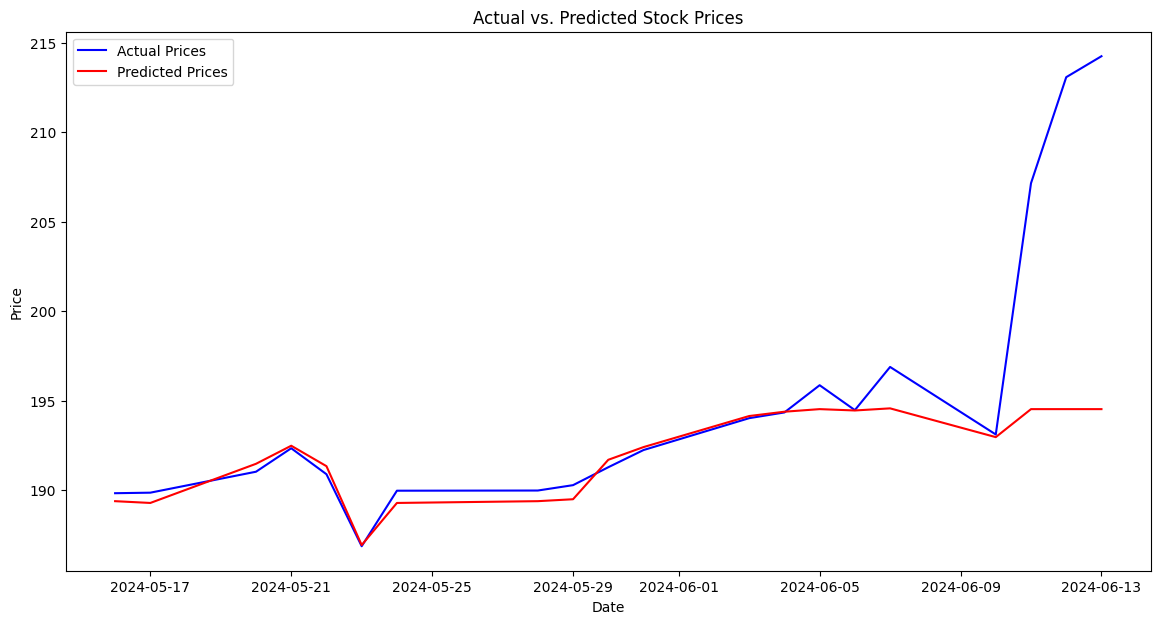

In [11]:
import matplotlib.pyplot as plt

def plot_results(df, y_test, y_pred_test):
    plt.figure(figsize=(14, 7))
    plt.plot(df.index[-len(y_test):], y_test, label='Actual Prices', color='blue')
    plt.plot(df.index[-len(y_test):], y_pred_test, label='Predicted Prices', color='red')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Actual vs. Predicted Stock Prices')
    plt.legend()
    plt.show()

def main():
    api_key = '8FHEYWXTU6IPYSH4'
    symbol = 'AAPL'  # Example stock symbol
    data = fetch_stock_data(api_key, symbol)
    df = preprocess_data(data)
    X_train, X_test, y_train, y_test = split_data(df)
    model = train_model(X_train, y_train)
    mse_train, mse_test, r2_train_percent, r2_test_percent = evaluate_model(model, X_train, X_test, y_train, y_test)
    print(f'Training MSE: {mse_train}, R2: {r2_train_percent:.2f}%')
    print(f'Testing MSE: {mse_test}, R2: {r2_test_percent:.2f}%')
    y_pred_test = model.predict(X_test)
    plot_results(df, y_test, y_pred_test)

if __name__ == "__main__":
    main()
